### Task : automatic segmentation of mails, problem statement

This Lab aims to build an email segmentation tool, dedicated to separate the email header from its
body. It is proposed to perform this task by learning a HMM (A, B, π) with two states, one (state 1) for
the header, the other (state 2) for the body. In this model, it is assumed that each mail actually contains
a header : the decoding necessarily begins in the state 1.

#### Q1 : Give the value of the π vector of the initial probabilities
Knowing that each mail contains exactly one header and one body, each mail follows once the transition
from 1 to 2. The transition matrix (A(i, j) = P(j|i)) estimated on a labeled small corpus has thus the
following form :
A =[[0.999218078035812; 0.000781921964187974];
    [                0;                    1]]

π=[0;1] 

#### Q2 : What is the probability to move from state 1 to state 2 ? What is the probability
to remain in state 2 ? What is the lower/higher probability ? Try to explain why
A mail is represented by a sequence of characters. Let N be the number of different characters. Each
part of the mail is characterized by a discrete probability distribution on the characters P(c|s), with s = 1
or s = 2.

To move from state 1 to state 2: 0.000781921964187974

To remain in state 2: 1

Once we get in state 2, we cannot go back to state one. 

And since we are working caracter by caracter, to go from 1 to 2 is very low because there are a lot of caracter for each mail and the transition is on only one caracter.

 #### Q3 : What is the size of B ?
 
 

We have 2 states and N caracters, so the size of B is (2,N)

#### Material

Coding/decoding mails

Emails are represented as ASCII character vectors.
In dat.zip, mail.txt can be transformed into a vector of numbers (between 0 and 255) (one vector per
line) in a text ;
Files of the form dat/*.dat contain the already encoded versions of the corresponding mails. The list
is in mail.lst.
Use the command np.loadtxt to load the dat files.

#### Distribution files

For the first part of the Lab, we work with the distributions that are provided in the P.text file.
Each of the columns of this file contains the distribution of the probabilities of occurrence of each
character. of the ASCII codes respectively in the header and in the body. These distributions were learned
on a small corpus labeled with 10 emails ; there are obvious differences, especially in areas where ASCII
codes correspond to alphabetic characters, as you can see by viewing these distributions.

#### To implement
All the work is to be done under Python.
— implement the Viterbi algorithm. Concretely, it comes to coding a function which takes as argument
a vector of observations and the parameters of the model, and returns a vector of states representing
the most probable sequence.
— test it on some mails that are given in the dat directory (especially mail11.txt to mail30.txt).

#### Visualizing segmentation

Finally, the utility segment.pl allows to visualize a segmentation produced by your segmenter in the
form of the best path found by the Viterbi algorithm (in a vector of 1 and 2). It produces a file path.txt
where the segmentation is visualized. It calls coder.pl that encodes the mail in ascii. To use it :

In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
X = np.loadtxt('/home/jean/Downloads/dat/dat/mail30.dat')

In [120]:
A = np.array([[0.999218078035812, 0.000781921964187974],[0,1]])

In [121]:
init = np.array([1,0])

In [122]:
P = np.loadtxt('/home/jean/Downloads/PerlScriptAndModel/PerlScriptAndModel/P.text')

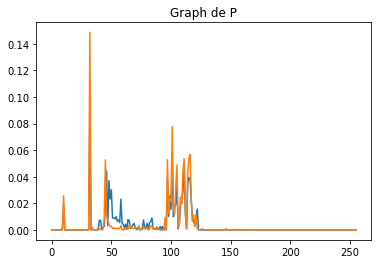

In [123]:
plt.title('Graph de P')
plt.plot(P)
plt.show()

In [124]:
def viterbi(X,A,B,init):
    T = X.shape[0]
    M = A.shape[0] 
    B = B.T
    omega = np.zeros((T,M))
    
    omega[0, :] = np.log(init * B[:, int(X[0])]+0.00000001)
 
    prev = np.zeros((T - 1, M))
    
    for t in range(1, T):
        for j in range(M):
            # Same as Forward Probability
            probability = omega[t - 1] + np.log(A[:, j]+0.00000001) + np.log(B[j, int(X[t])]+0.00000001)
 
            # This is our most probable state given previous state at time t (1)
            prev[t - 1, j] = np.argmax(probability)
 
            # This is the probability of the most probable state (2)
            omega[t, j] = np.max(probability)
 
    # Path Array
    S = np.zeros(T)
 
    # Find the most probable last hidden state
    last_state = np.argmax(omega[T - 1, :])
 
    S[0] = last_state
 
    backtrack_index = 1
    for i in range(T - 2, -1, -1):
        S[backtrack_index] = prev[i, int(last_state)]
        last_state = prev[i, int(last_state)]
        backtrack_index += 1
 
    # Flip the path array since we were backtracking
    S = np.flip(S, axis=0)
 
    # Convert numeric values to actual hidden states
    result = []
    for s in S:
        if s == 0:
            result.append("1")
        else:
            result.append("2")
 
    return result

In [125]:
l=viterbi(X,A,P,init)

In [126]:
mail = '/home/jean/Downloads/dat/dat/mail30.txt'

In [127]:
# Give the character where we are cutting
c=0
for i in range (len(l)):
    if l[i]=='1':
        c+=1
print(c)

2222


In [130]:
with open(mail, 'r') as file:
    data = file.read().replace('\n', '')

In [136]:
# Give the header
data[0:c+1]

'From ilug-admin@linux.ie  Fri Aug 23 11:07:51 2002Return-Path: <ilug-admin@linux.ie>Delivered-To: zzzz@localhost.netnoteinc.comReceived: from localhost (localhost [127.0.0.1])\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7419C4416C\tfor <zzzz@localhost>; Fri, 23 Aug 2002 06:06:33 -0400 (EDT)Received: from phobos [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:06:33 +0100 (IST)Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MJtgZ22471 for    <zzzz-ilug@spamassassin.taint.org>; Thu, 22 Aug 2002 20:55:42 +0100Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org    (8.9.3/8.9.3) with ESMTP id UAA19436; Thu, 22 Aug 2002 20:53:00 +0100X-Authentication-Warning: lugh.tuatha.org: Host root@localhost [127.0.0.1]    claimed to be lughReceived: from mail02.svc.cra.dublin.eircom.net    (mail02.svc.cra.dublin.eircom.net [159.134.118.1

#### We can check several header and compare it

In [137]:
X = np.loadtxt('/home/jean/Downloads/dat/dat/mail25.dat')
l=viterbi(X,A,P,init)

# Give the character where we are cutting
c=0
for i in range (len(l)):
    if l[i]=='1':
        c+=1
print(c)

mail = '/home/jean/Downloads/dat/dat/mail25.txt'

with open(mail, 'r') as file:
    data = file.read().replace('\n', '')
    
    # Give the header
data[0:c+1]

2319


'From ilug-admin@linux.ie  Fri Aug 23 11:07:47 2002Return-Path: <ilug-admin@linux.ie>Delivered-To: zzzz@localhost.netnoteinc.comReceived: from localhost (localhost [127.0.0.1])\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 6F82C4416B\tfor <zzzz@localhost>; Fri, 23 Aug 2002 06:06:31 -0400 (EDT)Received: from phobos [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:06:31 +0100 (IST)Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MIE5Z19072 for    <zzzz-ilug@spamassassin.taint.org>; Thu, 22 Aug 2002 19:14:05 +0100Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org    (8.9.3/8.9.3) with ESMTP id TAA15460; Thu, 22 Aug 2002 19:12:03 +0100X-Authentication-Warning: lugh.tuatha.org: Host root@localhost [127.0.0.1]    claimed to be lughReceived: from nwkea-mail-1.sun.com (nwkea-mail-1.sun.com [192.18.42.13])    by lugh.tuatha.org (8.

In [138]:
X = np.loadtxt('/home/jean/Downloads/dat/dat/mail15.dat')
l=viterbi(X,A,P,init)

# Give the character where we are cutting
c=0
for i in range (len(l)):
    if l[i]=='1':
        c+=1
print(c)

mail = '/home/jean/Downloads/dat/dat/mail15.txt'

with open(mail, 'r') as file:
    data = file.read().replace('\n', '')
    
    # Give the header
data[0:c+1]

2183


'From fork-admin@xent.com  Thu Aug 22 16:37:41 2002Return-Path: <fork-admin@xent.com>Delivered-To: zzzz@localhost.netnoteinc.comReceived: from localhost (localhost [127.0.0.1])\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 5DB9843F99\tfor <zzzz@localhost>; Thu, 22 Aug 2002 11:37:40 -0400 (EDT)Received: from phobos [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 16:37:40 +0100 (IST)Received: from xent.com ([64.161.22.236]) by dogma.slashnull.org    (8.11.6/8.11.6) with ESMTP id g7MFbVZ12617 for <zzzz@spamassassin.taint.org>;    Thu, 22 Aug 2002 16:37:32 +0100Received: from lair.xent.com (localhost [127.0.0.1]) by xent.com (Postfix)    with ESMTP id D8D5029409A; Thu, 22 Aug 2002 08:35:09 -0700 (PDT)Delivered-To: fork@spamassassin.taint.orgReceived: from sunserver.permafrost.net (u172n16.hfx.eastlink.ca    [24.222.172.16]) by xent.com (Postfix) with ESMTP id 3703F294099 for    <fork@xent.com>; Thu, 22 Aug 2002 08:34:40 -07

In [139]:
X = np.loadtxt('/home/jean/Downloads/dat/dat/mail27.dat')
l=viterbi(X,A,P,init)

# Give the character where we are cutting
c=0
for i in range (len(l)):
    if l[i]=='1':
        c+=1
print(c)

mail = '/home/jean/Downloads/dat/dat/mail27.txt'

with open(mail, 'r') as file:
    data = file.read().replace('\n', '')
    
    # Give the header
data[0:c+1]

1771


'From ilug-admin@linux.ie  Fri Aug 23 11:07:42 2002Return-Path: <ilug-admin@linux.ie>Delivered-To: zzzz@localhost.netnoteinc.comReceived: from localhost (localhost [127.0.0.1])\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 762374415C\tfor <zzzz@localhost>; Fri, 23 Aug 2002 06:06:30 -0400 (EDT)Received: from phobos [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:06:30 +0100 (IST)Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MHxuZ18619 for    <zzzz-ilug@spamassassin.taint.org>; Thu, 22 Aug 2002 18:59:56 +0100Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org    (8.9.3/8.9.3) with ESMTP id SAA14875; Thu, 22 Aug 2002 18:57:44 +0100Received: from ni-mail1.dna.utvinternet.net (mail.d-n-a.net [194.46.8.11])    by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA14844 for    <ilug@linux.ie>; Thu, 22 Aug 2002 18:57:36 +0100X-Auth

#### After few tests, we can say we don't always stop on the right character but at least very close to it.